Application of TDA in Cosmology
Esteban
Kevin
Franklin

In [1]:
import dionysus as d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

In [3]:
#prints the information in the .fits file (not entirely sure what all entries mean)
#more can be found in https://lambda.gsfc.nasa.gov/common/fits_header.cfm?fitsfile=%2Fdata%2Fmap%2Fdr5%2Fskymaps%2F9yr%2Fraw%2Fwmap%5Fimap%5Fr9%5F9yr%5FK1%5Fv5%2Efits
#tmap.info()
tmap = fits.open('wmap_imap_r9_9yr_W3_v5.fits')
#apparently the first extension of this .fits file contains the image data 
data = tmap[1].data
#seems that the "columns" are temperature and number of observations (counts)
#indicates that dataset is a counts vs temperature point cloud of the sky
#cols = tmap[1].columns
#cols.info()


#prints a section of the data, seems like it is a list of tuples

print(data[0:5])

n = len(data)-1

x_val = np.empty(n) #temperatures
y_val = np.empty(n) #counts
temperature_data = np.empty([n, 2])
temperature_data_small = np.empty([1000,2])

for i in tqdm(range(0,n)):
    x_val[i] = data[i][0]
    y_val[i] = data[i][1]
    temperature_data[i,0] = x_val[i]
    temperature_data[i,1] = y_val[i]

for i in tqdm(range(0,999)):
    temperature_data_small[i,0] = data[i][0]
    temperature_data_small[i,1] = data[i][1]

#supposed to plot the image data when the data is in a 2D numpy array form
#plt.figure()
#plt.imshow(data, cmap='gray')
#plt.colorbar()


  0%|          | 377/3145727 [00:00<13:55, 3764.91it/s]

[(2.2998378, 3074.1948) (2.9589684, 3126.1853) (1.6670746, 3130.274 )
 (1.7374254, 3113.7168) (2.318041 , 3137.191 )]


100%|██████████| 999/999 [00:00<00:00, 3816.47it/s]


3145727


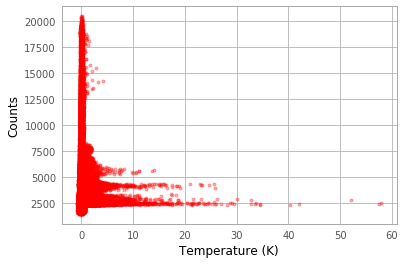

In [7]:
temp = x_val
counts = y_val
print(len(temp))
plt.plot(temp, counts,'.',color='red',alpha = 0.3)
plt.xlabel('Temperature (K)')
plt.ylabel('Counts')
plt.show()

0.3526382779413834


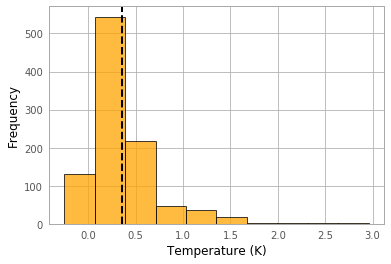

In [17]:
plt.hist(temp[0:1000], ec='black',facecolor='orange', alpha=0.75)
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.axvline(np.mean(temp[0:1000]), color='k', linestyle='dashed', linewidth=2)
print(np.mean(temp[0:1000]))
#average temparature of the universe is 2.72K, average here is around 0.35 
#discrepancy due to Stefan-Boltzmann and Planck radiation law (energy flux ignored in here)

Text(0, 0.5, 'Frequency')

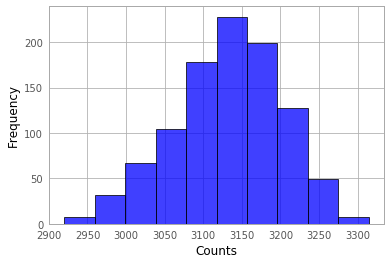

In [18]:
plt.hist(counts[0:1000], ec='black',facecolor='blue', alpha=0.75)
plt.xlabel('Counts')
plt.ylabel('Frequency')

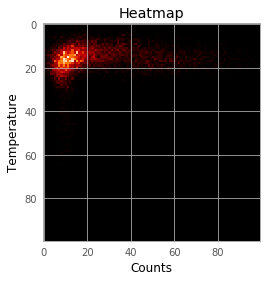

In [19]:
# Creates heatmap
heatmap, xedges, yedges = np.histogram2d(temp[0:10000],counts[0:10000],bins=100)
#extent = [xedges[0], xedges[4], yedges[0], yedges[1000]]

# Plot heatmap
plt.clf()
plt.title('Heatmap')
plt.ylabel('Temperature')
plt.xlabel('Counts')
plt.imshow(heatmap)
plt.show()

In [20]:
print(heatmap[15])
print(temperature_data_small[0:5][0:5])
np.save('Heatmap.npy', heatmap)
np.save('temperature_data_small.npy',temperature_data_small)

[ 0.  1.  5. 10. 10. 16. 17. 21. 39. 35. 28. 48. 36. 33. 29. 28. 25. 17.
 23. 22. 16.  9. 20. 24. 11.  4. 14. 14. 14. 12. 10.  9.  7.  8.  5.  8.
  4.  6.  6.  4.  8.  5.  5.  2.  4.  9.  7.  7.  4.  4.  9.  5.  6.  6.
  5.  0.  4.  6.  5.  3.  3.  9.  3.  2.  1.  6.  1.  3.  3.  1.  3.  1.
  2.  4.  5.  3.  1.  2.  2.  0.  2.  1.  0.  0.  1.  2.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[[2.29983783e+00 3.07419482e+03]
 [2.95896840e+00 3.12618530e+03]
 [1.66707456e+00 3.13027393e+03]
 [1.73742545e+00 3.11371680e+03]
 [2.31804109e+00 3.13719092e+03]]
